In [2]:
#Importar en csv Test 2%
import pandas as pd
data_test=pd.read_csv('DataTest2%.csv')

In [3]:
coautores=[]
#########################
coautor=data_test.Coautor
#########################
coautor.reset_index(drop=True, inplace=True)
for r in coautor:
    sep= r.split(',')
    m= len(sep)
    aux=[]
    for i in range(0,m):
        if i==m-1:
            aux.append(int(sep[i][2:-2]))
        else:
            aux.append(int(sep[i][2:-1]))
    coautores.append(aux)

In [4]:
len(coautores)

3151

In [5]:
#Leer los abstracts del data test
#abstract
ab=[]
############################
abstract=data_test.Abstract
############################
abstract.reset_index(drop=True, inplace=True)

for r in abstract:
    sep= r.split(',')
    m= len(sep)
    aux=[]
    for i in range(0,m):
        if i==m-1:
            aux.append(sep[i][2:-2])
        else:
            aux.append(sep[i][2:-1])
    ab.append(aux)
len(ab)

3151

In [6]:
abst=[]
for r in ab:
    #print(r)
    aux=' '.join(r)
    abst.append(aux)
len(abst)

3151

In [7]:
abst[0]

'fluctuations glacier mass volume indicative changes climate system also strongly affect regional climate hydrology explore possible relationships radial growth schrenk spruce picea schrenkiana fisch et mey mass balance tsentralniy tuyuksuyskiy ts tuyuksuyskiy glacier located northern slopes tianshan mountains arid central asia attempt reconstruct historical mass balance variability ts tuyuksuyskiy glacier using tree-ring widths stable carbon isotope chronologies reconstruction able explain 62.1 variance annual glacier mass balance record 1965–2014 calibration period also analyzed centennial mass balance variability linkages climate change ts.tuyuksuyskiy glacier negative annual mass balance years since 1968 undergone rapid longest melting process past 166 years mass balance change glacier controlled combination temperature precipitation conditions study could useful detailed glaciological hydrological climatological assessments portion tianshan mountains 2018 authors'

In [8]:
#Generar vector de palabras:
import gensim
import collections
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile
tagged_documents_abs = []
index = 0
for new in abst:
    tagged_documents_abs.append(TaggedDocument(new, [index]))
    index += 1


In [9]:
tagged_documents_abs[0]

TaggedDocument(words='fluctuations glacier mass volume indicative changes climate system also strongly affect regional climate hydrology explore possible relationships radial growth schrenk spruce picea schrenkiana fisch et mey mass balance tsentralniy tuyuksuyskiy ts tuyuksuyskiy glacier located northern slopes tianshan mountains arid central asia attempt reconstruct historical mass balance variability ts tuyuksuyskiy glacier using tree-ring widths stable carbon isotope chronologies reconstruction able explain 62.1 variance annual glacier mass balance record 1965–2014 calibration period also analyzed centennial mass balance variability linkages climate change ts.tuyuksuyskiy glacier negative annual mass balance years since 1968 undergone rapid longest melting process past 166 years mass balance change glacier controlled combination temperature precipitation conditions study could useful detailed glaciological hydrological climatological assessments portion tianshan mountains 2018 auth

In [10]:
#Cargar el modelo de wikipedia
#print("empieza cargar el modelo")
model_wiki = Doc2Vec.load("enwiki_doc2vec")

In [12]:
index=0
lista_vector_abs=[]
for tag in tagged_documents_abs:
    aux=model_wiki.infer_vector(abst[index])
    lista_vector_abs.append(aux)
    #print (index)
    index+=1
print(lista_vector_abs)

3151


In [14]:
import community
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
#Creación de grafo con peso de titulo
g_abs=nx.Graph()
ind=0
###############################
autor=data_test.IdAutor
###############################
autor.reset_index(drop=True, inplace=True)
pesos=[]
for node in autor:
    g_abs.add_node(node)

for edge in coautores:
    counter=Counter(edge)
    #dist=levenshteinDistance()
    for elem in counter:
        encontrado=0
        if elem == autor[ind]:
            encontrado=0
        else:
            for a in autor:
                if elem== a:
                    encontrado=1
        if encontrado:
            n=0
            for item in autor:
                if (item==elem):
                    indice=n
                    break
                n+=1
            dist=cosine_similarity([lista_vector_abs[ind]],[lista_vector_abs[indice]])
            #dist=levenshteinDistance(abst[ind],abst[indice])
            #Normalizando
            #peso=2 - dist[0][0]
            if (dist[0][0]>1):
                peso=1
            else:
                if (dist[0][0]<0):
                    peso=0
                else:
                    peso=dist[0][0]
            #peso=dist[0][0]
            pesos.append(peso)
            g_abs.add_edge(autor[ind], elem, weight=peso)
    ind+=1
    if (ind%100)==0: print (ind)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [17]:
print (nx.info(g_abs))

Name: 
Type: Graph
Number of nodes: 3151
Number of edges: 172
Average degree:   0.1092


2992.0
0.9921515304042127


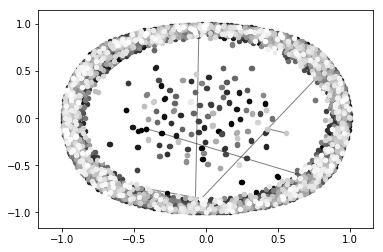

In [28]:
import community
import networkx as nx
import matplotlib.pyplot as plt
G=g_abs
#first compute the best partition
partition = community.best_partition(G,weight='weight')
mod_abs=community.modularity(partition,G)
#drawing
size = float(len(set(partition.values())))
print(size)
print(mod_abs)
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [17]:
from collections import Counter
e=[1,2,3,4,5,4]
c=Counter(e)

In [19]:
#Leer los titulo del data test
#abstract
titu=[]
############################
tittle=data_test.Titulo
############################
tittle.reset_index(drop=True, inplace=True)

for r in tittle:
    sep= r.split(',')
    m= len(sep)
    aux=[]
    for i in range(0,m):
        if i==m-1:
            aux.append(sep[i][2:-2])
        else:
            aux.append(sep[i][2:-1])
    titu.append(aux)
len(titu)

3151

In [20]:
titulo=[]
for r in titu:
    #print(r)
    aux=' '.join(r)
    titulo.append(aux)
len(titulo)

3151

In [21]:
titulo[0]

'tree ring-based record annual mass balance changes ts.tuyuksuyskiy glacier linkages climate change tianshan mountains'

In [22]:
#Generar vector de palabras:
import gensim
import collections
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile
tagged_documents_titulo = []
index = 0
for new in titulo:
    tagged_documents_titulo.append(TaggedDocument(new, [index]))
    index += 1


In [23]:
tagged_documents_titulo[0]

TaggedDocument(words='tree ring-based record annual mass balance changes ts.tuyuksuyskiy glacier linkages climate change tianshan mountains', tags=[0])

In [24]:
index=0
lista_vector_titulo=[]
for tag in tagged_documents_titulo:
    aux=model_wiki.infer_vector(titulo[index])
    lista_vector_titulo.append(aux)
    #print (index)
    index+=1
print(index)

3151


In [64]:
doc1 = model_wiki.infer_vector("yo la quiero a morir")
doc2 = model_wiki.infer_vector("te amo")
dist= cosine_similarity([doc1],[doc2])
dist[0][0]

-0.038559478

In [25]:
import community
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
#Creación de grafo con peso de titulo
g_tittle=nx.Graph()
ind=0
###############################
autor=data_test.IdAutor
###############################
autor.reset_index(drop=True, inplace=True)
pesos=[]
for node in autor:
    g_tittle.add_node(node)

for edge in coautores:
    counter=Counter(edge)
    #dist=levenshteinDistance()
    for elem in counter:
        encontrado=0
        if elem == autor[ind]:
            encontrado=0
        else:
            for a in autor:
                if elem== a:
                    encontrado=1
        if encontrado:
            n=0
            for item in autor:
                if (item==elem):
                    indice=n
                    break
                n+=1
            dist=cosine_similarity([lista_vector_titulo[ind]],[lista_vector_titulo[indice]])
            #dist=levenshteinDistance(abst[ind],abst[indice])
            #Normalizando
            
            if (dist[0][0]>1):
                peso=1
            else:
                if (dist[0][0]<0):
                    peso=0
                else:
                    peso=dist[0][0]
            #peso=2-dist[0][0]
            pesos.append(peso)
            g_tittle.add_edge(autor[ind], elem, weight=peso)
    ind+=1
    if (ind%100)==0: print (ind)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [26]:
print (nx.info(g_tittle))

Name: 
Type: Graph
Number of nodes: 3151
Number of edges: 172
Average degree:   0.1092


2993.0
0.9921429227666889


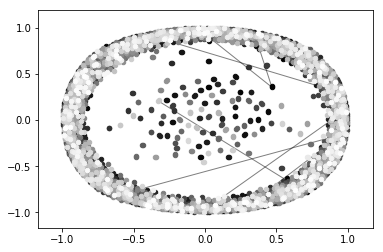

In [27]:
import community
import networkx as nx
import matplotlib.pyplot as plt

G=g_tittle
#first compute the best partition
partition = community.best_partition(G,weight='weight')
mod_tittle=community.modularity(partition,G)
#drawing
size = float(len(set(partition.values())))
print(size)
print(mod_tittle)
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [29]:
#keywords
key=[]
keyword=data_test.Keyword
keyword.reset_index(drop=True, inplace=True)

for r in keyword:
    sep= r.split(',')
    m= len(sep)
    aux=[]
    for i in range(0,m):
        if i==m-1:
            aux.append(sep[i][2:-2])
        else:
            aux.append(sep[i][2:-1])
    key.append(aux)

In [30]:
kw=[]
for r in key:
    #print(r)
    aux=' '.join(r)
    kw.append(aux)
len(kw)

3151

In [31]:
kw[0]

'Annual mass balance reconstruction  Arid central asia  Climate change  Tianshan mountains  Tree rings  TS.Tuyuksuyskiy glacier'

In [32]:
#Generar vector de palabras:
import gensim
import collections
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile
tagged_documents_kw = []
index = 0
for new in kw:
    tagged_documents_kw.append(TaggedDocument(new, [index]))
    index += 1


In [33]:
tagged_documents_kw[0]

TaggedDocument(words='Annual mass balance reconstruction  Arid central asia  Climate change  Tianshan mountains  Tree rings  TS.Tuyuksuyskiy glacier', tags=[0])

In [35]:
index=0
lista_vector_kw=[]
for tag in tagged_documents_kw:
    aux=model_wiki.infer_vector(kw[index])
    lista_vector_kw.append(aux)
    #print (index)
    index+=1
print(index)

3151


In [36]:
import community
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
#Creación de grafo con peso de titulo
g_key=nx.Graph()
ind=0
###############################
autor=data_test.IdAutor
###############################
autor.reset_index(drop=True, inplace=True)
pesos=[]
for node in autor:
    g_key.add_node(node)

for edge in coautores:
    counter=Counter(edge)
    #dist=levenshteinDistance()
    for elem in counter:
        encontrado=0
        if elem == autor[ind]:
            encontrado=0
        else:
            for a in autor:
                if elem== a:
                    encontrado=1
        if encontrado:
            n=0
            for item in autor:
                if (item==elem):
                    indice=n
                    break
                n+=1
            dist=cosine_similarity([lista_vector_kw[ind]],[lista_vector_kw[indice]])
            #dist=levenshteinDistance(abst[ind],abst[indice])
            #Normalizando
            
            if (dist[0][0]>1):
                peso=1
            else:
                if (dist[0][0]<0):
                    peso=0
                else:
                    peso=dist[0][0]
            #peso=2-dist[0][0]
            pesos.append(peso)
            g_key.add_edge(autor[ind], elem, weight=peso)
    ind+=1
    if (ind%100)==0: print (ind)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


2994.0
0.992134870869357


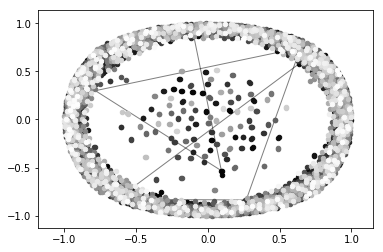

In [37]:
import community
import networkx as nx
import matplotlib.pyplot as plt

G=g_key
#first compute the best partition
partition = community.best_partition(G,weight='weight')
mod_key=community.modularity(partition,G)
#drawing
size = float(len(set(partition.values())))
print(size)
print(mod_key)
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [38]:
#juntar keywords (kw) abstract (abst) tittle(text) KWR
#total kwr kw
i=0
kwr=[]
for k in kw:
    kwr.append(k+" "+abst[i]+" "+titulo[i])
    i+=1
print(kwr[0])
print(kw[0])
print(abst[0])
print(titulo[0])
print(kwr[0])
len(kwr)

Annual mass balance reconstruction  Arid central asia  Climate change  Tianshan mountains  Tree rings  TS.Tuyuksuyskiy glacier fluctuations glacier mass volume indicative changes climate system also strongly affect regional climate hydrology explore possible relationships radial growth schrenk spruce picea schrenkiana fisch et mey mass balance tsentralniy tuyuksuyskiy ts tuyuksuyskiy glacier located northern slopes tianshan mountains arid central asia attempt reconstruct historical mass balance variability ts tuyuksuyskiy glacier using tree-ring widths stable carbon isotope chronologies reconstruction able explain 62.1 variance annual glacier mass balance record 1965–2014 calibration period also analyzed centennial mass balance variability linkages climate change ts.tuyuksuyskiy glacier negative annual mass balance years since 1968 undergone rapid longest melting process past 166 years mass balance change glacier controlled combination temperature precipitation conditions study could u

3151

In [42]:
#Generar vector de palabras:
import gensim
import collections
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile
tagged_documents_kwr = []
index = 0
for new in kwr:
    tagged_documents_kwr.append(TaggedDocument(new, [index]))
    index += 1


In [43]:
tagged_documents_kwr[0]

TaggedDocument(words='Annual mass balance reconstruction  Arid central asia  Climate change  Tianshan mountains  Tree rings  TS.Tuyuksuyskiy glacier fluctuations glacier mass volume indicative changes climate system also strongly affect regional climate hydrology explore possible relationships radial growth schrenk spruce picea schrenkiana fisch et mey mass balance tsentralniy tuyuksuyskiy ts tuyuksuyskiy glacier located northern slopes tianshan mountains arid central asia attempt reconstruct historical mass balance variability ts tuyuksuyskiy glacier using tree-ring widths stable carbon isotope chronologies reconstruction able explain 62.1 variance annual glacier mass balance record 1965–2014 calibration period also analyzed centennial mass balance variability linkages climate change ts.tuyuksuyskiy glacier negative annual mass balance years since 1968 undergone rapid longest melting process past 166 years mass balance change glacier controlled combination temperature precipitation co

In [45]:
index=0
lista_vector_kwr=[]
for tag in tagged_documents_kwr:
    aux=model_wiki.infer_vector(kwr[index])
    lista_vector_kwr.append(aux)
    #print (index)
    index+=1
print(index)

3151


In [46]:
import community
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
#Creación de grafo con peso de titulo
g_kwr=nx.Graph()
ind=0
###############################
autor=data_test.IdAutor
###############################
autor.reset_index(drop=True, inplace=True)
pesos=[]
for node in autor:
    g_kwr.add_node(node)

for edge in coautores:
    counter=Counter(edge)
    #dist=levenshteinDistance()
    for elem in counter:
        encontrado=0
        if elem == autor[ind]:
            encontrado=0
        else:
            for a in autor:
                if elem== a:
                    encontrado=1
        if encontrado:
            n=0
            for item in autor:
                if (item==elem):
                    indice=n
                    break
                n+=1
            dist=cosine_similarity([lista_vector_kwr[ind]],[lista_vector_kwr[indice]])
            #dist=levenshteinDistance(abst[ind],abst[indice])
            #Normalizando
            
            if (dist[0][0]>1):
                peso=1
            else:
                if (dist[0][0]<0):
                    peso=0
                else:
                    peso=dist[0][0]
            #peso=2-dist[0][0]
            pesos.append(peso)
            g_kwr.add_edge(autor[ind], elem, weight=peso)
    ind+=1
    if (ind%100)==0: print (ind)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


2995.0
0.9921415312978291


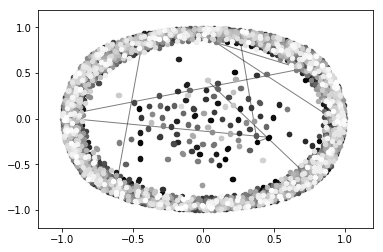

In [47]:
import community
import networkx as nx
import matplotlib.pyplot as plt

G=g_kwr
#first compute the best partition
partition = community.best_partition(G,weight='weight')
mod_kwr=community.modularity(partition,G)
#drawing
size = float(len(set(partition.values())))
print(size)
print(mod_kwr)
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()